In [1]:
using DifferentialEquations, StaticArrays, DynamicalSystems, CairoMakie, JLD

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

function output(idx, parameter, u0)
    println("index: $idx; I0: $parameter");flush(stdout)
    println("u0: $u0");flush(stdout)
end
function output(Λ, u0)
    println("Λ: $Λ");flush(stdout)
    println("last point: $u0");flush(stdout)
end
function separate()
    println("----------------");flush(stdout)
    println("  ");flush(stdout)
end

separate (generic function with 1 method)

In [3]:
time = 500.0
transient_time = 250.0
tstep = 0.001
trange = range(0.0, time, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
const α = 1.15; const U0 = 0.3;
const xthr = 0.9; const ythr = 0.4
const ΔU0 = 0.4

0.4

In [5]:
u0 = SA[0.5287662926292962, 0.9611190233149197, 0.41838101329795496]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.5287662926292962
 0.9611190233149197
 0.41838101329795496

In [6]:
I0range = range( -1.509460, -1.509490, length = 200 )

-1.50946:-1.507537688442211e-7:-1.50949

In [7]:
Λs =  zeros(length(I0range), 3)
u0s = zeros(length(I0range), 3);

In [8]:
for (idx, I0) in enumerate(I0range)

    if idx == 1
        global u0 = [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]
    end

    output(idx, I0, u0)

    p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
    ds = ContinuousDynamicalSystem(TM,  u0, p)

    tr = trajectory(ds, 150.0, Δt = tstep; Ttr = transient_time, diffeq = integ_set)
    u0 = tr[end]; ds = ContinuousDynamicalSystem(TM,  u0, p)
    Λ = lyapunovspectrum(ds, time; diffeq = integ_set)
    Λs[idx, :] = Λ
    u0s[idx, :] = u0
    
    output(Λs[idx, :], u0s[idx, :])
    separate()
    
end

index: 1; I0: -1.50946
u0: [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]
Λ: [0.0016930088002566762, -1.1799716790633203, -17.26270049096511]
last point: [8.183397240352166, 0.7636239261632258, 0.41752007278134956]
----------------
  
index: 2; I0: -1.5094601507537688
u0: [8.183397240352166, 0.7636239261632258, 0.41752007278134956]
Λ: [0.015162145695300413, -1.1700875246128715, -17.241301872565074]
last point: [0.8941322732517439, 0.9262388527059991, 0.45285213972294797]
----------------
  
index: 3; I0: -1.5094603015075376
u0: [0.8941322732517439, 0.9262388527059991, 0.45285213972294797]
Λ: [0.003059544166172551, -1.160571675547728, -17.26246486391749]
last point: [0.39653628800671775, 0.9601836525240348, 0.3852263739610621]
----------------
  
index: 4; I0: -1.5094604522613064
u0: [0.39653628800671775, 0.9601836525240348, 0.3852263739610621]
Λ: [0.015329934352118, -1.1401215408087308, -17.23710439782574]
last point: [1.4864245609782787, 0.8860110905554957, 0.4440047973

last point: [0.36663872327785113, 0.9273814195861829, 0.3699579951424039]
----------------
  
index: 33; I0: -1.509464824120603
u0: [0.36663872327785113, 0.9273814195861829, 0.3699579951424039]
Λ: [0.0038005777580530494, -0.7904221211176018, -17.02858582120278]
last point: [0.3659861912717865, 0.9253236184333843, 0.36962276307899505]
----------------
  
index: 34; I0: -1.5094649748743718
u0: [0.3659861912717865, 0.9253236184333843, 0.36962276307899505]
Λ: [0.003821933779133328, -0.7707545480552206, -16.994378596429794]
last point: [0.37404541121511614, 0.9419581566423141, 0.3742228126767938]
----------------
  
index: 35; I0: -1.5094651256281406
u0: [0.37404541121511614, 0.9419581566423141, 0.3742228126767938]
Λ: [0.009411451762478677, -0.7487726148594386, -16.97318260602363]
last point: [0.40214345402931245, 0.9609496115594112, 0.3875886171356737]
----------------
  
index: 36; I0: -1.5094652763819096
u0: [0.40214345402931245, 0.9609496115594112, 0.3875886171356737]
Λ: [0.005470294522

index: 64; I0: -1.5094694974874372
u0: [1.4409931683206165, 0.8880593568030252, 0.44505931737971777]
Λ: [0.1303409870098382, -0.016350285315756292, -14.619833475772202]
last point: [6.982088895913351, 0.7094163511821833, 0.4020630473220028]
----------------
  
index: 65; I0: -1.509469648241206
u0: [6.982088895913351, 0.7094163511821833, 0.4020630473220028]
Λ: [0.19496417166122623, -0.012407951715168045, -14.454224880499812]
last point: [0.6640107978008251, 0.9487288156308985, 0.43647048961291807]
----------------
  
index: 66; I0: -1.5094697989949748
u0: [0.6640107978008251, 0.9487288156308985, 0.43647048961291807]
Λ: [0.18146490519271202, -0.015344727477988535, -14.438390457946442]
last point: [0.5857258588862057, 0.956533110271363, 0.4267717527924898]
----------------
  
index: 67; I0: -1.5094699497487438
u0: [0.5857258588862057, 0.956533110271363, 0.4267717527924898]
Λ: [0.19714336075245267, -0.011191769177960607, -14.498130977530247]
last point: [0.7344601130974535, 0.9425004853894

Λ: [0.005735549579879179, -0.09895571395231516, -14.551922873897833]
last point: [0.48065034899627096, 0.9630039321054823, 0.40938320631183195]
----------------
  
index: 96; I0: -1.5094743216080402
u0: [0.48065034899627096, 0.9630039321054823, 0.40938320631183195]
Λ: [0.007733026576291556, -0.13484965865008558, -14.526006643295407]
last point: [0.6164116260215773, 0.9491523847540903, 0.43156812106567294]
----------------
  
index: 97; I0: -1.509474472361809
u0: [0.6164116260215773, 0.9491523847540903, 0.43156812106567294]
Λ: [0.03151122336530808, -0.19586733880369767, -14.456514814766432]
last point: [1.045198512333888, 0.9128121087979084, 0.4546222698424548]
----------------
  
index: 98; I0: -1.5094746231155778
u0: [1.045198512333888, 0.9128121087979084, 0.4546222698424548]
Λ: [0.012988763725786709, -0.26552322161103536, -14.443878140870678]
last point: [0.9002084425702196, 0.9249935628466922, 0.45335735197370103]
----------------
  
index: 99; I0: -1.5094747738693468
u0: [0.9002084

last point: [0.6902921527584688, 0.9474299949917969, 0.4389402703836173]
----------------
  
index: 127; I0: -1.5094789949748744
u0: [0.6902921527584688, 0.9474299949917969, 0.4389402703836173]
Λ: [0.004831940754873886, -0.14950166274529966, -13.696097495070545]
last point: [0.43159905637797713, 0.9119148036356047, 0.4003472967723503]
----------------
  
index: 128; I0: -1.5094791457286432
u0: [0.43159905637797713, 0.9119148036356047, 0.4003472967723503]
Λ: [0.023541124030027737, -0.3749969804974627, -13.622302760981654]
last point: [1.2016682774175298, 0.9015461174304279, 0.4516883832431299]
----------------
  
index: 129; I0: -1.509479296482412
u0: [1.2016682774175298, 0.9015461174304279, 0.4516883832431299]
Λ: [0.02290155448802963, -0.10224478934213722, -14.034792264300783]
last point: [0.8689145539563963, 0.9278483678551357, 0.45225936086459]
----------------
  
index: 130; I0: -1.509479447236181
u0: [0.8689145539563963, 0.9278483678551357, 0.45225936086459]
Λ: [0.01566288834908279

----------------
  
index: 158; I0: -1.5094836683417086
u0: [0.3675938387056069, 0.9358038811394029, 0.36981339479221653]
Λ: [0.014749661171956079, -1.1854696324618113, -13.555500958677206]
last point: [1.351779908624659, 0.8926301168613473, 0.44747500271995205]
----------------
  
index: 159; I0: -1.5094838190954774
u0: [1.351779908624659, 0.8926301168613473, 0.44747500271995205]
Λ: [0.00677401368550487, -1.116662653910937, -13.641821939409528]
last point: [1.4231638024650217, 0.8892823273792198, 0.4459221845018255]
----------------
  
index: 160; I0: -1.5094839698492462
u0: [1.4231638024650217, 0.8892823273792198, 0.4459221845018255]
Λ: [0.021879416665550197, -1.057345541077184, -13.647483312801036]
last point: [1.3180937636758603, 0.8945011412494731, 0.44843992109241376]
----------------
  
index: 161; I0: -1.5094841206030152
u0: [1.3180937636758603, 0.8945011412494731, 0.44843992109241376]
Λ: [0.0032064311574473794, -1.0162228198185783, -13.73740571531436]
last point: [0.3614616363

Λ: [-0.000893937123301487, -0.8857888318143396, -13.9971685587377]
last point: [6.693744865946295, 0.8047662478033281, 0.42841869294728374]
----------------
  
index: 190; I0: -1.5094884924623115
u0: [6.693744865946295, 0.8047662478033281, 0.42841869294728374]
Λ: [0.013167256833229432, -0.8933774329065689, -14.00270668059059]
last point: [1.3674215957786264, 0.8917562801844928, 0.44700597558430805]
----------------
  
index: 191; I0: -1.5094886432160803
u0: [1.3674215957786264, 0.8917562801844928, 0.44700597558430805]
Λ: [0.003885267713655467, -0.8865133433826737, -13.971094981239503]
last point: [0.4058111938015909, 0.7340702367438036, 0.3815337910596445]
----------------
  
index: 192; I0: -1.5094887939698491
u0: [0.4058111938015909, 0.7340702367438036, 0.3815337910596445]
Λ: [0.002877077978168012, -0.8845307086222627, -13.986543683895507]
last point: [0.5450583591244876, 0.940009094734002, 0.4231546579022389]
----------------
  
index: 193; I0: -1.5094889447236182
u0: [0.54505835912

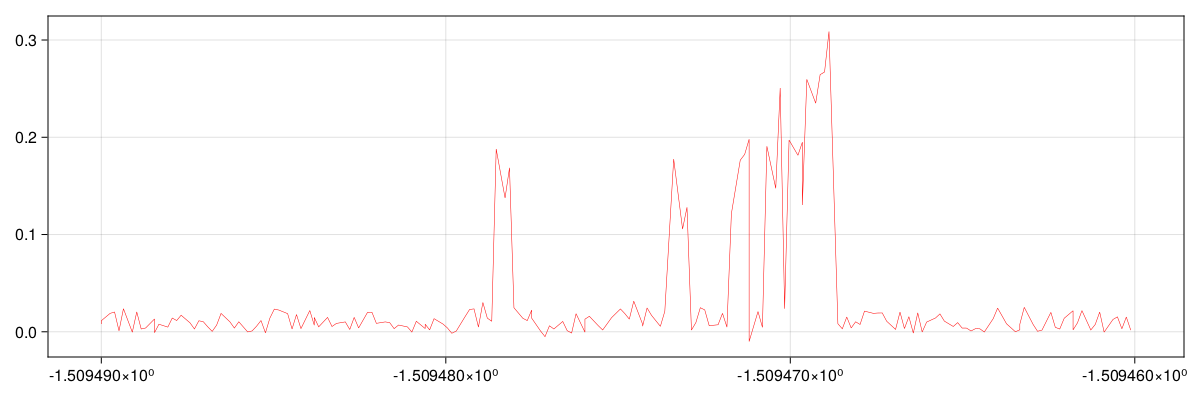

In [9]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1])
lines!(axis, I0range, Λs[:, 1], color = :red, linewidth = 0.5)
f

In [13]:
E_right_space = load("E_scale_right_200_dots.jld")["data"];
# Λs = load("LSE_left_space.jld")["data"];

In [11]:
save("LSE_right_space_200_points.jld", "data", Λs)
save("u0s_right_space_200_points.jld", "data", u0s);

In [30]:
CairoMakie.activate!(type = "png")

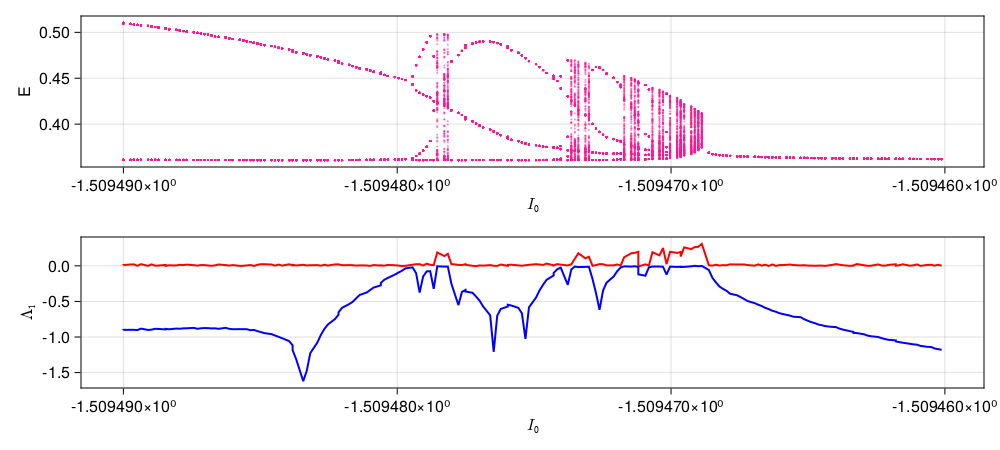

In [37]:
f = Figure(resolution = (1000, 450))
axis1 = Axis(f[2, 1], xlabel = L"I_0", ylabel = L"\Lambda_1")
axis2 = Axis(f[1, 1], xlabel = L"I_0", ylabel = "E")



for (j, p) in enumerate(I0range)
    scatter!(axis2, fill(p, length(E_right_space[j])), E_right_space[j]; color = ("deeppink", 0.5), markersize = 2.0)
end
lines!(axis1, I0range, Λs[:, 1], color = :red, linewidth = 2.0)
lines!(axis1, I0range, Λs[:, 2], color = :blue, linewidth = 2.0)
f